In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline 

dataframe = pd.ExcelFile("testetcc.xlsx")
dataFrame = pd.read_excel(dataframe, read_excel=None)

In [2]:
df = dataFrame.dropna()

In [3]:
df

,Data,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,Balança comercial US$,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
0,2003-01-01,2.33,2.47,2.25,200.0,26.38,1.040289e+09,127177.5,2.21,0,120511.0
1,2003-02-01,2.28,1.46,1.57,200.0,24.31,1.008624e+09,131373.6,3.01,0,131846.0
2,2003-03-01,1.53,1.37,1.23,200.0,23.58,1.422889e+09,138690.5,0.00,0,125162.0
3,2003-04-01,0.92,1.38,0.97,240.0,24.90,1.600226e+09,141388.1,-3.89,0,130799.0
4,2003-05-01,-0.26,0.99,0.61,240.0,26.38,2.416734e+09,139605.8,-0.87,0,126942.0
...,...,...,...,...,...,...,...,...,...,...,...
216,2021-01-01,2.58,0.27,0.25,1100.0,1.81,-2.046388e+08,650694.2,2.38,1528758,180904.0
217,2021-02-01,2.53,0.82,0.86,1100.0,1.57,1.822781e+09,673362.3,0.25,1346528,186718.0
218,2021-03-01,2.94,0.86,0.93,1100.0,2.43,6.410389e+09,723966.1,10.53,2197488,208801.0
219,2021-04-01,1.51,0.38,0.31,1100.0,2.55,9.867923e+09,682431.7,34.66,1910264,191853.0


In [4]:
df.columns

Index(['Data', 'IGPM  Δ%', 'INPC Δ%', 'IPCA  Δ%', 'Salário minimo R$',
       'Taxa Celic Over % a.a', 'Balança comercial US$', 'PIB R$ milhões',
       'Produção industrial Δ% a.a', 'Casos covid', 'Unidades Vendidas'],
      dtype='object')

In [5]:
df['Data'].head()

0   2003-01-01
1   2003-02-01
2   2003-03-01
3   2003-04-01
4   2003-05-01
Name: Data, dtype: datetime64[ns]

In [6]:
df.set_index('Data',inplace = True)

Text(0.5, 1.0, 'Casos de Covid e Vendas')

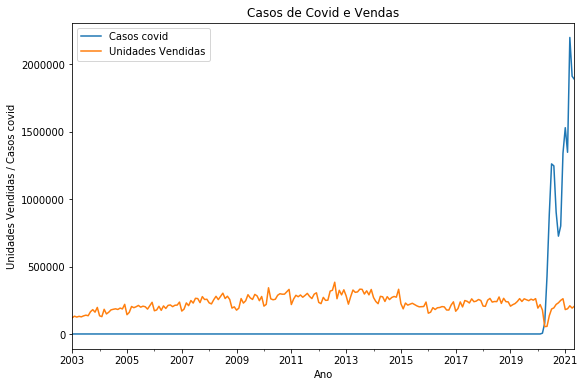

In [7]:
figura = plt.figure(figsize=(9,6))
df['Casos covid'].plot()
df['Unidades Vendidas'].plot()
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Unidades Vendidas / Casos covid')
plt.title('Casos de Covid e Vendas')

Text(0.5, 1.0, 'Gráfico de área impacto nas vendas')

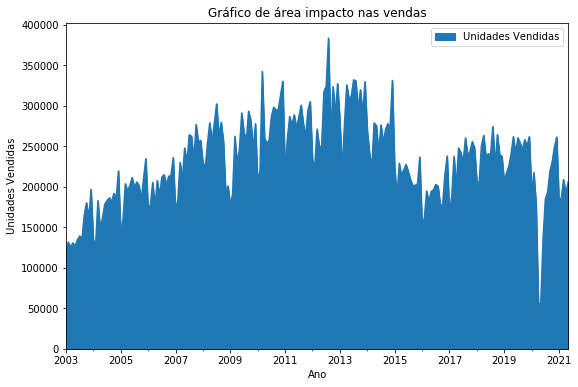

In [8]:
figura = plt.figure(figsize=(9,6))
df['Unidades Vendidas'].plot(kind='area')
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Unidades Vendidas')
plt.title('Gráfico de área impacto nas vendas')

Text(0.5, 1.0, 'Registros com Covid')

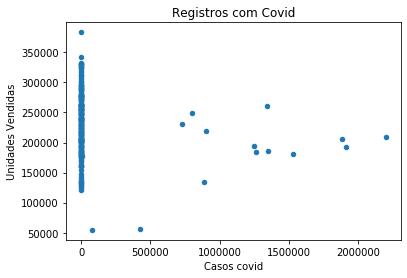

In [9]:

df.plot(x='Casos covid',y = 'Unidades Vendidas',kind='scatter')  
plt.title('Registros com Covid')

Text(0.5, 1.0, 'Boxplot das vendas')

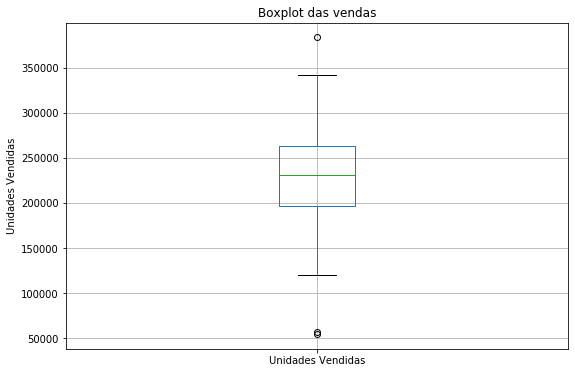

In [10]:
## informações em torno da mediana
figura = plt.figure(figsize=(9,6))
df.boxplot('Unidades Vendidas',return_type ='axes')
plt.ylabel('Unidades Vendidas')
plt.title('Boxplot das vendas')

Text(0.5, 1.0, 'Histograma')

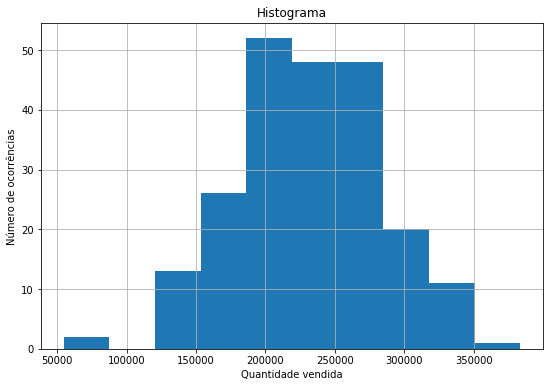

In [11]:
df.hist(('Unidades Vendidas'),figsize=(9,6))
plt.xlabel('Quantidade vendida')
plt.ylabel('Número de ocorrências')
plt.title('Histograma')

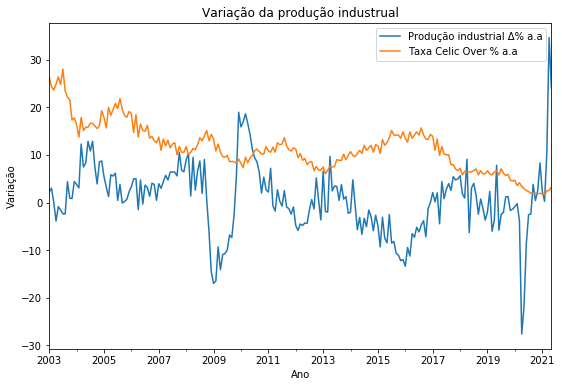

In [12]:
figura = plt.figure(figsize=(9,6))
df['Produção industrial Δ% a.a'].plot()
df['Taxa Celic Over % a.a'].plot()
plt.ylabel('Variação')
plt.xlabel('Ano')
plt.ylabel('Variação')
plt.title('Variação da produção industrual')
plt.legend()

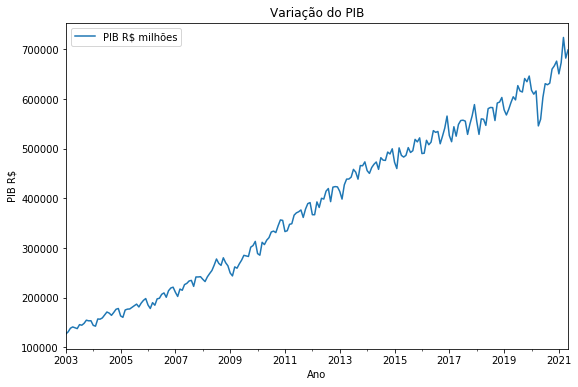

In [13]:
figura = plt.figure(figsize=(9,6))
df['PIB R$ milhões'].plot()
plt.ylabel('PIB R$')
plt.xlabel('Ano')
plt.title('Variação do PIB')
plt.legend()

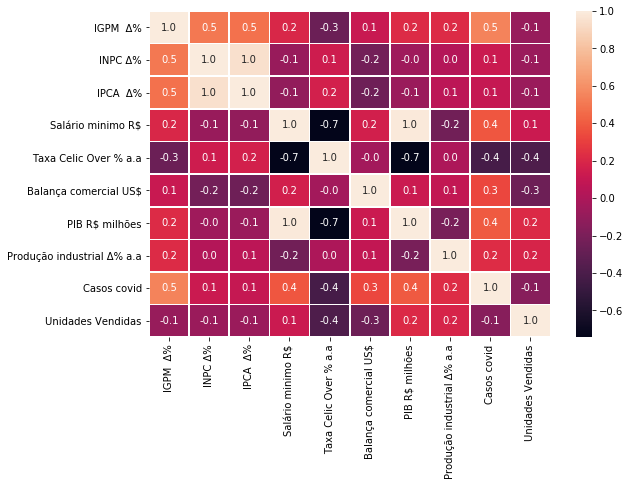

In [14]:
import seaborn as sn
correlation = df.corr()
figura = plt.figure(figsize=(9,6))
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
df.describe()

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,Balança comercial US$,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
count,221.000000,221.000000,221.000000,221.000000,221.000000,2.210000e+02,221.000000,221.000000,2.210000e+02,221.000000
mean,0.626787,0.472172,0.469774,623.782805,11.428597,2.408337e+09,385859.992308,0.769683,7.486812e+04,230858.936652
std,0.822482,0.377263,0.334212,273.260761,5.110991,2.199564e+09,163991.027587,7.362130,3.222269e+05,52436.658555
min,-1.100000,-0.300000,-0.380000,200.000000,1.570000,-4.496455e+09,127177.500000,-27.610000,0.000000e+00,54580.000000
25%,0.150000,0.210000,0.250000,380.000000,7.960000,1.103814e+09,232680.400000,-3.080000,0.000000e+00,196257.000000
50%,0.520000,0.430000,0.440000,622.000000,10.950000,2.542653e+09,391595.100000,0.800000,0.000000e+00,230927.000000
75%,0.970000,0.640000,0.620000,880.000000,14.160000,3.691672e+09,526564.700000,4.740000,0.000000e+00,263490.000000
max,4.340000,2.470000,2.250000,1100.000000,28.020000,9.867923e+09,723966.100000,34.660000,2.197488e+06,383535.000000


Text(0.5, 1.0, 'Soma acumulada das vendas')

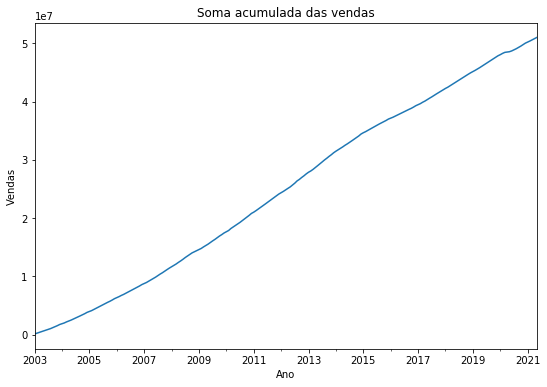

In [17]:
figura = plt.figure(figsize=(9,6))
df['Unidades Vendidas'].cumsum().plot()
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.title('Soma acumulada das vendas')

## Análise Parte - 2 Seaborn Graficos estatístiscos

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import numpy as np
%matplotlib inline

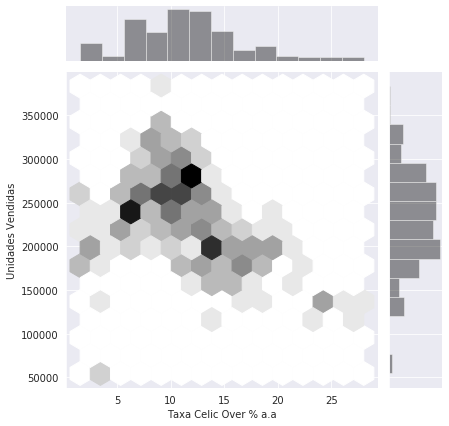

In [19]:
# Gráfico útil quando estiver trabalhando com grandes conjuntos de dados - Distribuição bivariada
with sns.axes_style("darkgrid"):
    sns.jointplot(x = "Taxa Celic Over % a.a", y = "Unidades Vendidas", data = df, kind = "hex", color  ="k");

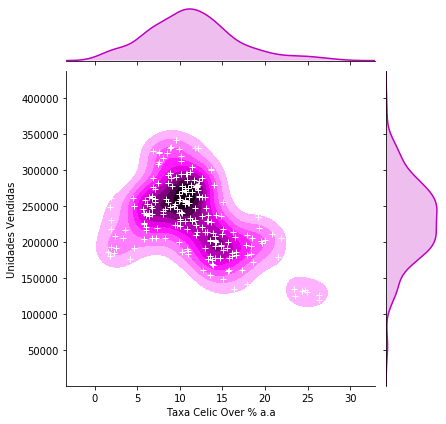

In [20]:
# Distribuição bivariada
g = sns.jointplot(x = "Taxa Celic Over % a.a", y = "Unidades Vendidas", data = df, kind = "kde", color = "m")
g.plot_joint(plt.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0);